Loading the Dataset, Helper Functions and Preprocessing


In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%matplotlib inline

In [3]:
#Importing the necessary libraries
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = "0"
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from keras import regularizers, layers, Model
import scipy.io
from scipy.signal import find_peaks
import pickle
from tensorflow.keras import backend as K

In [4]:
import sys
# Add the path to your Python files to the system path
# WARNING: Each person has different file path!!!
sys.path.append('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project')
# sys.path.append('/content/drive/MyDrive/CEE286_Project/')

# Now you can import your Python files
import preprocessing as PP

['load_mat_files_to_dfs', 'get_stats', 'convert_to_fft', 'normalize', 'find_peaks', 'segment_signals', 'generate_spectrogram']


In [5]:
# List functions in preprocessing module
pp_functions = [func for func in dir(PP) if callable(getattr(PP, func))]
print("Functions pp:", pp_functions)


Functions pp: ['convert_to_fft', 'find_peaks', 'generate_spectrogram', 'get_stats', 'load_mat_files_to_dfs', 'normalize', 'segment_signals', 'spectrogram']


In [ ]:
#RUN THIS DIRECTLY For Future Use This Directly Instead of running the segmentation again
undamaged_segments_df = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/undamaged_segmented_window_2000_step_400.npy')
damaged_1_segments_df = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/damaged_1_segmented_window_1000_step_400.npy')
damaged_2_segments_df = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/damaged_2_segmented_window_1000_step_400.npy')

# undamaged_segments_df = np.load('/content/drive/MyDrive/CEE286_Project/segmented_npy_files/undamaged_segmented_window_2000_step_400.npy')
# damaged_1_segments_df = np.load("/content/drive/MyDrive/CEE286_Project/segmented_npy_files/damaged_1_segmented_window_1000_step_400.npy")
# damaged_2_segments_df = np.load('/content/drive/MyDrive/CEE286_Project/segmented_npy_files/damaged_2_segmented_window_1000_step_400.npy')


print("Undamaged Segments DF Shape:", undamaged_segments_df.shape)
print("Damaged 1 Segments DF Shape:", damaged_1_segments_df.shape)
print("Damaged 2 Segments DF Shape:", damaged_2_segments_df.shape)


Undamaged Segments DF Shape: (2000, 6478)
Damaged 1 Segments DF Shape: (2000, 5666)
Damaged 2 Segments DF Shape: (2000, 5658)


In [6]:
undamaged_spectrograms = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/undamaged_spectrograms_w_500_o_400.npy')
damaged_1_spectrograms = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/damaged_1_spectrograms_w_500_o_400.npy')
damaged_2_spectrograms = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/damaged_2_spectrograms_w_500_o_400.npy')

f_undamaged = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/f_undamaged_w_500_o_400.npy')
f_damaged_1 = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/f_damaged_1_w_500_o_400.npy')
f_damaged_2 = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/f_damaged_2_w_500_o_400.npy')

t_undamaged = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/t_undamaged_w_500_o_400.npy')
t_damaged_1 = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/t_damaged_1_w_500_o_400.npy')
t_damaged_2 = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/t_damaged_2_w_500_o_400.npy')

print("Undamaged Spectrograms Shape:", undamaged_spectrograms.shape)
print("Damaged 1 Spectrograms Shape:", damaged_1_spectrograms.shape)
print("Damaged 2 Spectrograms Shape:", damaged_2_spectrograms.shape)

Undamaged Spectrograms Shape: (250, 16, 6478)
Damaged 1 Spectrograms Shape: (250, 16, 5666)
Damaged 2 Spectrograms Shape: (250, 16, 5658)


In [ ]:
type(undamaged_spectrograms)

<ipython-input-8-e6340ea1fd67>:3: UserWarning: shading value 'gourand' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(t_undamaged, f_undamaged, undamaged_spectrograms[:, :, 15], shading='gourand')


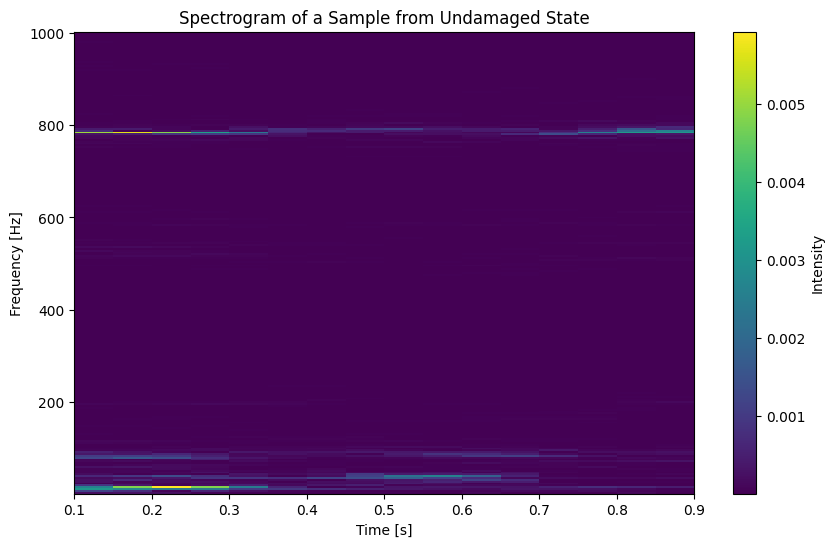

In [ ]:
# Plot the spectrogram of the first sample
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_undamaged, f_undamaged, undamaged_spectrograms[:, :, 15], shading='gourand')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of a Sample from Undamaged State')
plt.colorbar(label='Intensity')
plt.show()

<ipython-input-67-2f97c62aaea3>:3: UserWarning: shading value 'gourand' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(t_damaged_2, f_damaged_2, damaged_2_spectrograms[:, :, 5], shading='gourand')


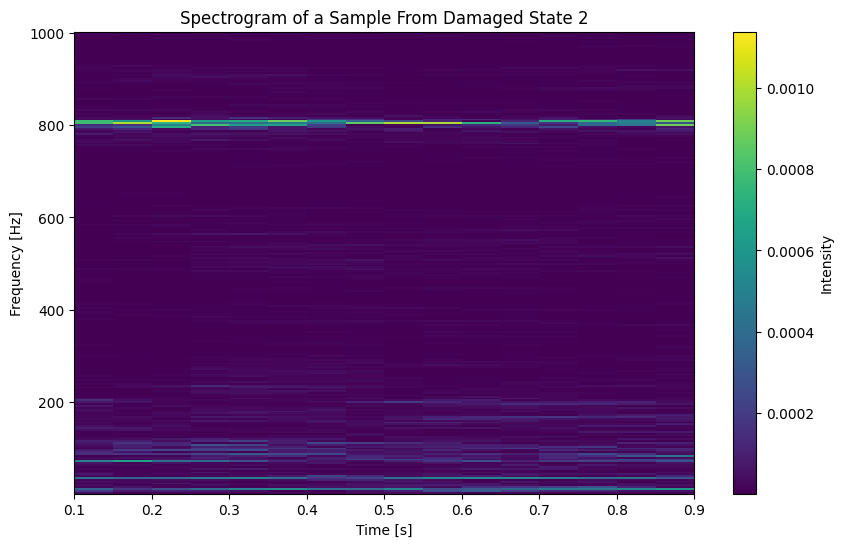

In [ ]:
# Plot the spectrogram of the first sample
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_damaged_2, f_damaged_2, damaged_2_spectrograms[:, :, 5], shading='gourand')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of a Sample From Damaged State 2')
plt.colorbar(label='Intensity')
plt.show()

In [ ]:
# # Convert the NumPy arrays to pandas DataFrames
# undamaged_spectrograms_df = pd.DataFrame(undamaged_spectrograms)
# damaged_1_spectrograms_df = pd.DataFrame(damaged_1_spectrograms)
# damaged_2_spectrograms_df = pd.DataFrame(damaged_2_spectrograms)


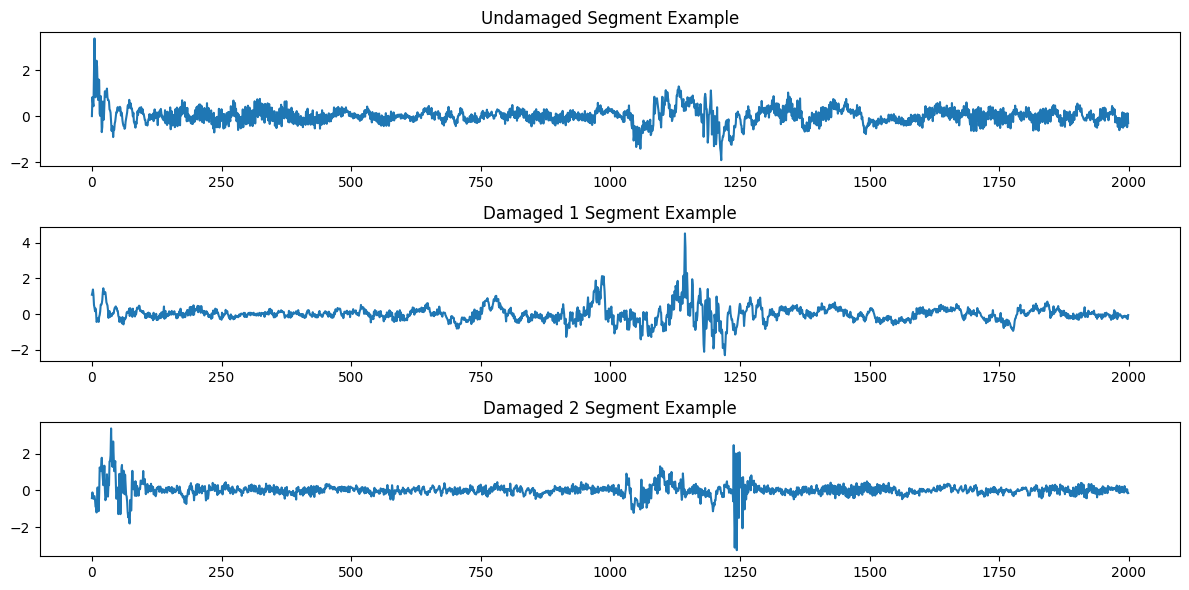

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(undamaged_segments_df[:,1])
plt.title('Undamaged Segment- Single Sample')

plt.subplot(3, 1, 2)
plt.plot(damaged_1_segments_df[:,1])
plt.title('Damaged 1 Segment Example')

plt.subplot(3, 1, 3)
plt.plot(damaged_2_segments_df[:,1])
plt.title('Damaged 2 Segment Single Sample')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Undamaged Segment- Single Sample')

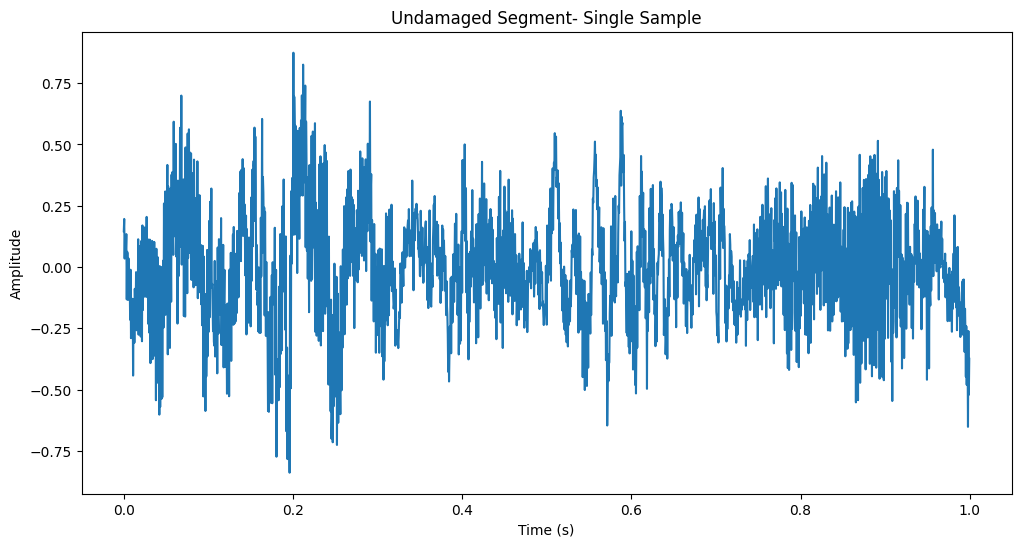

In [ ]:
plt.figure(figsize=(12, 6))
time = np.arange(0, 1, 1/2000)
plt.plot(time , undamaged_segments_df[:,15])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Undamaged Segment- Single Sample')

Text(0.5, 1.0, 'Damaged Segment- Single Sample')

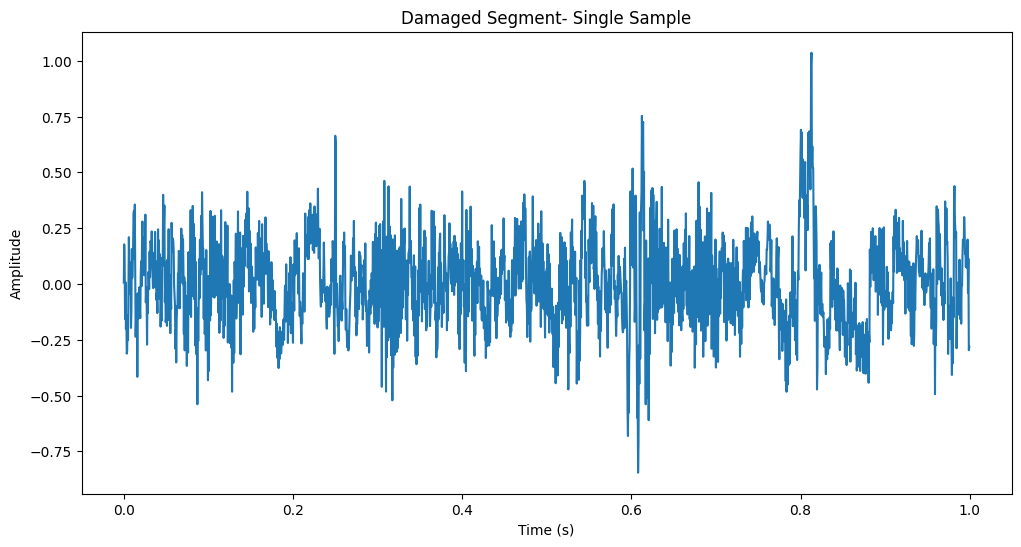

In [ ]:
plt.figure(figsize=(12, 6))
time = np.arange(0, 1, 1/2000)
plt.plot(time , damaged_2_segments_df[:,10])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Damaged Segment- Single Sample')

In [10]:
#Concatenate along the sample axis (axis=2) for merged input
merged_spectrograms = np.concatenate((undamaged_spectrograms, damaged_1_spectrograms, damaged_2_spectrograms), axis=2)
print("Merged Spectrograms Shape:", merged_spectrograms.shape)


Merged Spectrograms Shape: (250, 16, 17802)


In [11]:
#Actual Outputs (1,17802) = (1, 6478+5666+5658)

# Single Output where 0 is for Undamaged and 1 is for Damaged
undamaged = np.zeros((1, undamaged_spectrograms.shape[2]))
damaged_1 = np.ones((1, damaged_1_spectrograms.shape[2]))
damaged_2 = np.ones((1, damaged_2_spectrograms.shape[2]))

actual_outputs = np.concatenate((undamaged, damaged_1, damaged_2), axis=1)
#Check
print(actual_outputs[0, 0], actual_outputs[0, 6476], actual_outputs[0, 6477], actual_outputs[0, 6478], actual_outputs[0, 6479], actual_outputs[0, 6480], actual_outputs[0, 17801] )

actual_outputs = actual_outputs.T
print(actual_outputs.shape)

0.0 0.0 0.0 1.0 1.0 1.0 1.0
(17802, 1)


In [12]:
SEED = 19
np.random.seed(SEED)

indices = np.arange(actual_outputs.shape[0])  # input_data is [timestep, features, samples] we need to shuffle the examples
np.random.shuffle(indices)

# Shuffle all data using the same indices to maintain mapping
shuffled_input_data = merged_spectrograms[:, :, indices]
shuffled_actual_outputs = actual_outputs[indices, :]

# Print shapes for validation
print("Shuffled Input Data Shape:", shuffled_input_data.shape)
print("Shuffled Actual Outputs Shape:", shuffled_actual_outputs.shape)

# Define the split ratio
test_ratio = 0.1
test_size = int(test_ratio * shuffled_input_data.shape[2])

# Split the shuffled data into training and testing sets
input_train = shuffled_input_data[: , : , :-test_size]
input_test = shuffled_input_data[: , : , -test_size:]
actual_outputs_train = shuffled_actual_outputs[:-test_size, :]
actual_outputs_test = shuffled_actual_outputs[ -test_size: , :]

# Print shapes for validation
print("Input train shape:", input_train.shape)  # [timesteps, features, num_train_samples]
print("Actual outputs train shape:", actual_outputs_train.shape)  # [num_train_samples]
print("Input test shape:", input_test.shape)  # [timesteps, features, num_test_samples]
print("Actual outputs test shape:", actual_outputs_test.shape)  # [num_test_samples]


Shuffled Input Data Shape: (250, 16, 17802)
Shuffled Actual Outputs Shape: (17802, 1)
Input train shape: (250, 16, 16022)
Actual outputs train shape: (16022, 1)
Input test shape: (250, 16, 1780)
Actual outputs test shape: (1780, 1)


In [13]:
# Transpose input to match LSTM expectations: (samples, timesteps, features)
input_train = np.transpose(input_train[:,:,:], (2, 1, 0))  # (16022, 99, 20)
input_test = np.transpose(input_test[:,:,:], (2, 1, 0))  # (1780, 99, 20)
print("Input train shape:", input_train.shape)
print("Input test shape:", input_test.shape)

Input train shape: (16022, 16, 250)
Input test shape: (1780, 16, 250)


In [14]:
# Defining the F1 Score Metric
def f1_score(y_true, y_pred):
    # Convert predictions to binary (0 or 1) using a threshold of 0.5
    y_pred_binary = K.round(y_pred)

    # Calculate true positives, false positives, and false negatives
    tp = K.sum(K.cast(y_true * y_pred_binary, 'float'), axis=0)    # true positives
    fp = K.sum(K.cast((1 - y_true) * y_pred_binary, 'float'), axis=0) # false positives
    fn = K.sum(K.cast(y_true * (1 - y_pred_binary), 'float'), axis=0) # false negatives

    # Precision and recall
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    # Compute F1 score
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return K.mean(f1)

In [ ]:
#Check
f1_score(np.array([1,1,1]),np.array([0.51,0.51,0.5]))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(input_train.shape[1], input_train.shape[2])),  # First LSTM layer
    Dropout(0.1),
    LSTM(100, return_sequences=True),  # Second LSTM layer
    Dropout(0.1),
    LSTM(50, return_sequences=False),  # Third LSTM layer
    Dropout(0.1),
    Dense(5, activation='relu'),  # Fully connected layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy' , 'recall'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 16, 100)             │         140,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 16, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,261 (981.49 KB)

 Trainable params: 251,261 (981.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(input_train, actual_outputs_train,
                    validation_data=(input_test, actual_outputs_test),
                    epochs=40, batch_size=64)

from sklearn.metrics import accuracy_score, recall_score, f1_score

y_pred_prob = model.predict(input_test)

# Convert probabilities to binary predictions (0 or 1) using a threshold
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Calculate the metrics
accuracy = accuracy_score(actual_outputs_test, y_pred)
recall = recall_score(actual_outputs_test, y_pred)
f1 = f1_score(actual_outputs_test, y_pred)


print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


In [ ]:

# Save the model to the specified folder
model.save('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/trained_models/lstm_model_baseline_carnew.keras')


In [15]:

# Load the saved model
model = keras.models.load_model('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/trained_models/lstm_model_baseline_carnew.keras', compile=False)

# Compile the model (if needed)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy' , 'recall'])



In [16]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

y_pred_prob = model.predict(input_test)

# Convert probabilities to binary predictions (0 or 1) using a threshold
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Calculate the metrics
accuracy = accuracy_score(actual_outputs_test, y_pred)
recall = recall_score(actual_outputs_test, y_pred)
f1 = f1_score(actual_outputs_test, y_pred)


print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Test Accuracy: 0.8820
Test Recall: 0.8855
Test F1 Score: 0.9080


In [17]:

# Evaluate the model on the training data
train_loss, train_accuracy, train_recall = model.evaluate(input_train, actual_outputs_train, verbose=0)

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Recall: {train_recall:.4f}")

#Calculate training F1 score
y_pred_prob_train = model.predict(input_train)
y_pred_train = (y_pred_prob_train > threshold).astype(int)
train_f1 = f1_score(actual_outputs_train, y_pred_train)
print(f"Training F1 Score: {train_f1:.4f}")


Training Loss: 0.1568
Training Accuracy: 0.9373
Training Recall: 0.9384
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training F1 Score: 0.9500
